In [52]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [9]:
from monty.serialization import loadfn, dumpfn

In [10]:
complete_energies = loadfn('../data/final_competing_phase_calcs.json')

Defect formation energy = energy of defect supercell *min energy site* + Al atoms chem potential - non defect supercell - Cr atom chem potential

In [11]:
for key in complete_energies.keys():
    complete_energies[key]['defect formation energy'] = {}
    defect_supercell_e = complete_energies[key]['minimum energy site']['energy']
    supercell_e = complete_energies[key]['supercell']['energy'] # pristine supercell
    formation_energy = {}
    for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
        defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Al'] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Cr']
        formation_energy[key1] = defect_energy
    complete_energies[key]['defect formation energy'] = formation_energy

In [56]:
dumpfn(complete_energies, '../data/final_calculated_defect_formation_energies.json')

In [57]:
complete_energies = loadfn('../data/final_calculated_defect_formation_energies.json')

In [12]:
#plot of min that includes negatives
mfe = []
compounds = []
for key, val in complete_energies.items():
    compounds.append(complete_energies[key]['formula'])
    min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
    min_value = complete_energies[key]['defect formation energy'][min_key]
    mfe.append(val['defect formation energy'][min_key])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

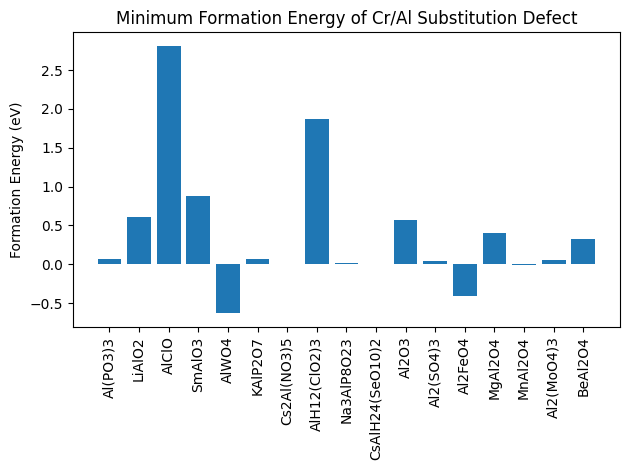

In [14]:
fig, ax = plt.subplots()
bars = ax.bar(compounds, mfe)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title("Minimum Formation Energy of Cr/Al Substitution Defect")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../figures/min_defect_formation_energies.png", dpi=300, bbox_inches='tight')
plt.show()

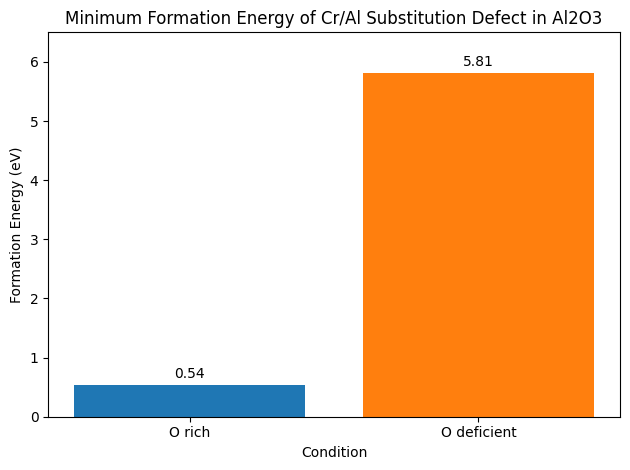

In [15]:
import matplotlib.pyplot as plt

# Data
conditions = ['O rich', 'O deficient']
formation_energies = [0.5400993289464999, 5.805219328946514]

# Set up the plot
fig, ax = plt.subplots()

# Plot bar chart
bars = ax.bar(conditions, formation_energies, color=['tab:blue', 'tab:orange'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Formatting
ax.set_title("Minimum Formation Energy of Cr/Al Substitution Defect in Al2O3")
ax.set_ylabel("Formation Energy (eV)")
ax.set_xlabel("Condition")

plt.tight_layout()
plt.ylim(0,6.5)
# Save and show
plt.savefig("../figures/Al2O3_defect_formation_energies.png", dpi=300, bbox_inches='tight')
plt.show()
